In [1]:
import pandas as pd
import geopandas as gpd
#import requests
import fiona
import datetime as dt
import folium
import geoplot
import descartes
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_311=pd.read_pickle('311_data.pickle')

In [3]:
neighborhoods_url='https://opendata.arcgis.com/datasets/055ca54e5fcc47329f081c9ef51d038e_0.geojson'
neighborhoods=gpd.read_file(neighborhoods_url)

## Explore 311 Data

In [21]:
pd.DatetimeIndex(df_311.CLOSEDDATETIME).year.value_counts()

2019    1176
2018     898
2017     738
2016     310
2015     241
2014     241
2020       6
Name: CLOSEDDATETIME, dtype: int64

In [22]:
df_311.groupby(['REASONNAME']).count()

,CLOSEDDATETIME,OPENEDDATETIME,TYPENAME,geometry,case_duration
REASONNAME,,,,,
Garbage & Recycling,1553,1553,1553,1553,1553
Unhealthy Conditions,2057,2057,2057,2057,2057


(array([1626.,  697.,  382.,  282.,  101.,   60.,   50.,   27.,   22.,
          20.,   16.,    3.,   11.,   38.,    6.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30.]),
 <a list of 15 Patch objects>)

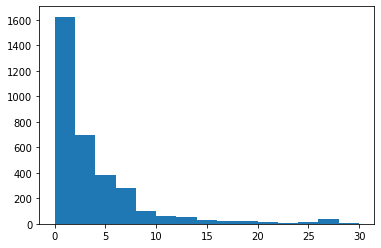

In [25]:
plt.hist([row.days for row in df_311.case_duration],bins=15, range =(0,30))

In [27]:
df_311.case_duration.describe()

count                       3610
mean     11 days 07:19:53.195844
std      31 days 05:41:36.757243
min              0 days 00:00:05
25%              1 days 00:32:47
50%              2 days 06:10:14
75%              6 days 00:04:58
max            336 days 17:03:59
Name: case_duration, dtype: object

## Map 311 Data

In [7]:
# check for missing geometry
df_311[df_311.geometry.bounds.minx<0].count()

CLOSEDDATETIME    3610
OPENEDDATETIME    3610
REASONNAME        3610
TYPENAME          3610
geometry          3610
case_duration     3610
dtype: int64

In [8]:
df_sjoined = gpd.sjoin(df_311, neighborhoods, op="within")

In [ ]:
df_sjoined

### Plot 311 cases by neighborhood

In [13]:
grouped = df_sjoined.groupby('BDNAME').size()
df = grouped.to_frame().reset_index()
df.columns = ['BDNAME', 'CASE_COUNT']

In [32]:
df.sort_values('CASE_COUNT')

,BDNAME,CASE_COUNT
7,Camden Industrial,1
34,Humboldt Industrial Area,1
37,Kenny,1
61,Page,1
38,Kenwood,2
...,...,...
47,Lyndale,106
73,Steven's Square - Loring Heights,113
49,Marcy Holmes,179
83,Whittier,184


In [15]:
merged_areas = neighborhoods.merge(df, on='BDNAME', how='outer')

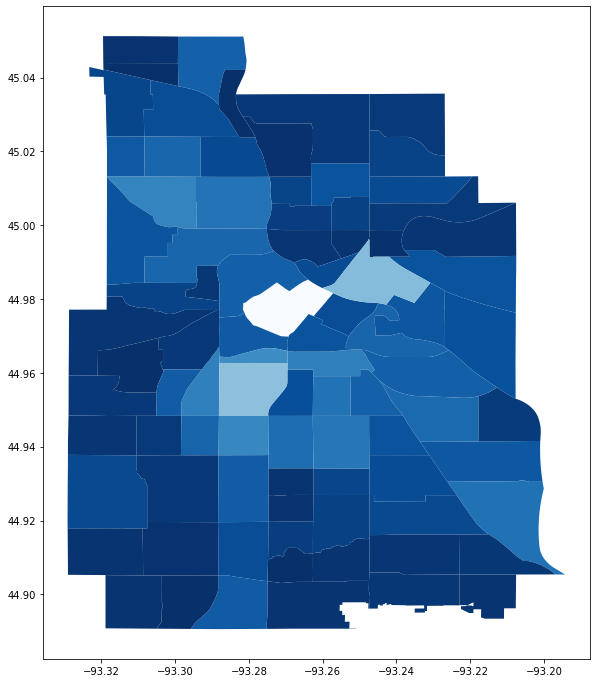

In [17]:
merged_areas.plot(column='CASE_COUNT', cmap="Blues_r", figsize=(12,12))

### Plot heatmap (geoplot)

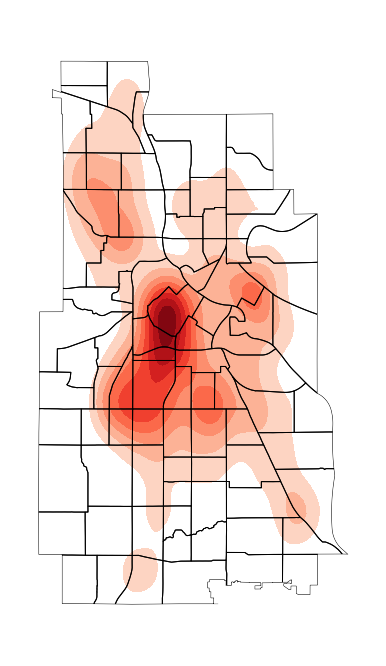

In [18]:
ax = geoplot.kdeplot(
    df_311, clip=neighborhoods.geometry,
    shade=True, cmap='Reds', figsize=(12,12),
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(neighborhoods, ax=ax, zorder=1)

### Plot 311 case locations (descartes)

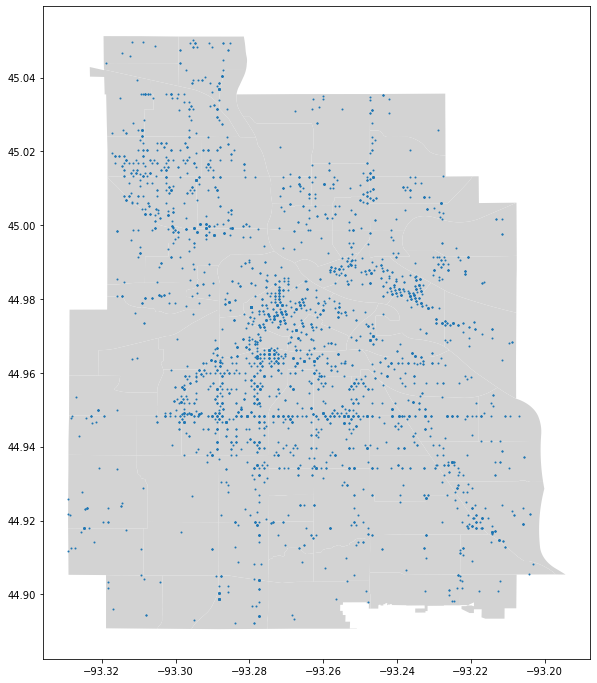

In [35]:
#plot individual 311 incidents
fig, ax = plt.subplots(figsize=(12,12))
neighborhoods.plot(color="LightGray", ax= ax);
df_311.plot(ax=ax, markersize=1);